In [1]:
%load_ext autoreload
%autoreload 2


In [4]:
import os
os.cpu_count()

128

In [3]:
import pickle
import numpy as np

superclass_pkl_path = "/workspace/SMILES_dataset/train/Superclass/index.pkl"
with open(superclass_pkl_path, "rb") as f:
    superclass = pickle.load(f)
# superclass, len(superclass)

In [5]:
all_classes = sum(superclass.values(), [])
all_classes


['Saccharides',
 'Flavonoids',
 'Fatty acyls',
 'Oligopeptides',
 'Fatty acyls',
 'Oligopeptides',
 'Nucleosides',
 'Fatty acyls',
 'Monoterpenoids',
 'Macrolides',
 'Oligopeptides',
 'unknown',
 'Polyprenols',
 'Polyethers',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'Peptide alkaloids',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'unknown',
 'Oligopeptides',
 'Oligopeptides',
 'Chromanes',
 'Oligopeptides',
 'Tryptophan alkaloids',
 'Tryptophan alkaloids',
 'Macrolides',
 'Tryptophan alkaloids',
 'Oligopeptides',
 'Tryptophan alkaloids',
 'Macrolides',
 'Oligopeptides',
 'Peptide alkaloids',
 'Linear polyketides',
 'Polyprenols',
 'Tryptophan alkaloids',
 'Polyprenols',
 'Polyprenols',
 'Polyprenols',
 'Saccharides',
 'Polyprenols',
 'Polyprenols',
 'Polyprenols',
 'Linear polyketides',
 'Macrolides',
 'Polyprenols',
 'Polyprenols',
 'Polyprenols',
 'Macrolides',
 'Oligopeptides',
 'Polyprenols',
 'Tryptophan alkaloids',
 'Ol

In [6]:
import matplotlib.pyplot as plt
from collections import Counter


# Count occurrences
counts = Counter(all_classes)
counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
# Extract labels and values
labels, values = zip(*counts.items())


In [7]:
top_20, count = (zip(*list(counts.items())[:21]))
top_20 = list(top_20)
top_20.remove("unknown")
len(top_20), top_20

(20,
 ['Diterpenoids',
  'Sesquiterpenoids',
  'Triterpenoids',
  'Flavonoids',
  'Steroids',
  'Tryptophan alkaloids',
  'Oligopeptides',
  'Monoterpenoids',
  'Isoflavonoids',
  'Coumarins',
  'Lignans',
  'Tyrosine alkaloids',
  'Macrolides',
  'Linear polyketides',
  'Polycyclic aromatic polyketides',
  'Meroterpenoids',
  'Small peptides',
  'Pseudoalkaloids',
  'Fatty acyls',
  'Aromatic polyketides'])

In [8]:
# Sample structure:
# counts = {'apple': 10, 'banana': 5, 'cherry': 2, 'date': 1}
# top20 = ['apple', 'banana']

new_counts = {key: counts[key] for key in counts if key in top_20}
new_counts['others'] = sum(counts[key] for key in counts if key not in top_20)


In [11]:
# Revised version keeping original function names

def compare_results_with_error_bars(*name_and_accu_results, save_path=None, filter_by=None):
    """
    Visualize class-wise accuracy with error bars and a consolidated 'Others' category if `filter_by` is provided.
    Input format: (name, {class: (mean_accuracy, std_accuracy)})
    """
    name1, result1 = name_and_accu_results[0]

    if filter_by is not None:
        all_classes = set(result1.keys())
        other_classes = all_classes - set(filter_by)

        def prepare_result(result):
            filtered = {k: v for k, v in result.items() if k in filter_by}
            if other_classes:
                other_vals = [result[k] for k in other_classes if k in result]
                if other_vals:
                    other_mean = np.mean([v[0] for v in other_vals])
                    other_std = np.mean([v[1] for v in other_vals])
                    filtered["Others"] = (other_mean, other_std)
            return filtered

        name_and_accu_results = [
            (label_name, prepare_result(result))
            for label_name, result in name_and_accu_results
        ]

    accuracy_dict1 = sorted(name_and_accu_results[0][1].items(), key=lambda x: x[1][0], reverse=True)
    np_names, _ = zip(*accuracy_dict1)
    x = np.arange(len(np_names), dtype=float)
    bar_width = 0.1
    x -= bar_width * (len(name_and_accu_results) - 1) / 2
    x_copy = x.copy()

    plt.figure(figsize=(70, 24))

    for label_name, result in name_and_accu_results:
        accus_mean = [result[name][0] for name in np_names]
        accus_std = [result[name][1] for name in np_names]

        bars = plt.bar(x, accus_mean, yerr=accus_std, width=bar_width, alpha=0.7,
                       label=label_name, capsize=5, error_kw=dict(lw=2))
        x += bar_width

    plt.ylabel("Accuracy", fontsize=48)
    plt.xlabel("Natural Product Class", fontsize=48)
    plt.title("Rank-1 Accuracy per Class with Error Bars", fontsize=48)
    plt.ylim(0.0, 0.7)
    plt.yticks(fontsize=48)
    plt.xticks(x_copy - 0.1, np_names, rotation=60, fontsize=48)
    plt.tick_params(axis='y', direction='inout', length=10, width=2)
    plt.grid(axis='y', linestyle='--')
    plt.legend(fontsize=48, bbox_to_anchor=(1.01, 1))

    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()
    plt.close()


def compare_results_from_pkl_files_with_error_bars(*name_and_pkls, save_path=None, filter_by=None):
    name_and_accu_results = []
    for name_and_pkl in name_and_pkls:
        name, *pkls = name_and_pkl
        result = get_avg_and_std_from_pkl_files(*pkls)
        name_and_accu_results.append((name, result))
    compare_results_with_error_bars(*name_and_accu_results, save_path=save_path, filter_by=filter_by)


def get_avg_and_std_from_pkl_files(*pkls):
    from collections import defaultdict
    result = defaultdict(list)
    for pkl in pkls:
        with open(pkl, "rb") as f:
            curr_val = pickle.load(f)
            for k, v in curr_val.items():
                result[k].append(v)
    return {k: (np.mean(v), np.std(v)) for k, v in result.items()}


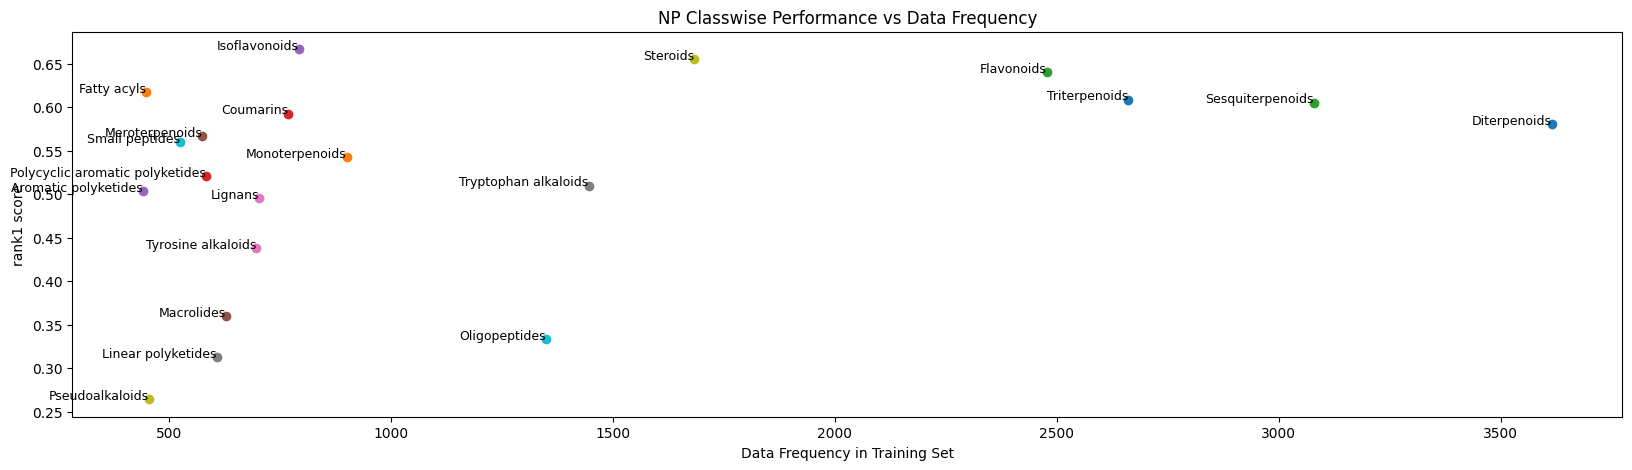

In [13]:

def plot_freq_vs_perf(*name_and_pkls, save_path=None, filter_by=None):
    name_and_accu_results = []
    for name_and_pkl in name_and_pkls:
        name, *pkls = name_and_pkl
        # if name in filter_by:
        result = get_avg_and_std_from_pkl_files(*pkls)
        name_and_accu_results.append((name, result))
    class_wise_accu = name_and_accu_results[0][1]
    
    plt.figure(figsize=(20, 5))
    for np_class, (mean_perf, std) in class_wise_accu.items():
        if np_class in filter_by:
            plt.scatter(new_counts[np_class], mean_perf)
            plt.text(new_counts[np_class], mean_perf, np_class, fontsize=9, ha='right')
            
    plt.xlabel("Data Frequency in Training Set")
    plt.ylabel("rank1 score")
    # plt.xticks(rotation=40, ha='right')  # Rotate labels for readability
    plt.title("NP Classwise Performance vs Data Frequency")
    plt.show()
    
x = plot_freq_vs_perf(
    ["All 3 NMRs", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_all_inputs.pkl"],
    filter_by = top_20
)
x